In [31]:
%pylab inline --no-import-all
import poppy
import logging
import astropy.units as u
logging.basicConfig(level=logging.critical)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Populating the interactive namespace from numpy and matplotlib


INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 2e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=2e-06 m, npix=1024, diam=6, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
/home/aadam/anaconda3/envs/Base3.6/lib/python3.6/site-packages/poppy/geometry.py:40: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * r**2 * (np.arctan(y1/x) - np.arctan(y0/x))
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (200x200 pixels, 0.010 arcsec / pix). 
DEBUG:poppy:MatrixF

TypeError: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs array([2.e-08, 3.e-08, 4.e-08, 5.e-08, 6.e-08, 7.e-08, 8.e-08, 9.e-08,
       2.e-07, 3.e-07, 4.e-07, 5.e-07, 6.e-07, 7.e-07, 8.e-07, 9.e-07,
       2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-0

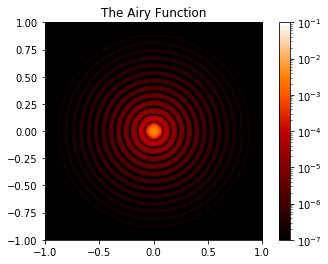

In [40]:
osys = poppy.OpticalSystem()
osys.add_pupil(poppy.CircularAperture(radius=3))    # pupil radius in meters
osys.add_detector(pixelscale=0.01, fov_arcsec=2)  #pixelscale: meters/pixel

psf = osys.calc_psf(2e-6, normalize='last')                            # wavelength in microns
poppy.display_psf(psf, title='The Airy Function')

In [35]:
psf[0].data.sum()

1.0

# Create a NRM mask


In [ ]:
# class myCustomOptic(poppy.AnalyticOpticalElement):
#     def __init__(self, *args, **kwargs):
#         """ If your optic has adjustible parameters, then save them as attributes here """
#         poppy.AnalyticOpticalElement.__init__(**kwargs)

#     def get_opd(self,wave):
#         y, x = self.get_coordinates(wave)
#         opd = some_function(x,y, wave.wavelength, self)
#         return opd

#     def get_transmission(self, wave):
#         y, x = self.get_coordinates(wave)
#         transmission = other_function(x,y, wave.wavelength, self)
#         return transmission

#     # behind the scenes poppy  will calculate:
#     #    phasor = transmission = np.exp(1.j * 2 * np.pi / wave.wavelength * opd)

#     @utils.quantity_input(radius=u.meter)
#     def __init__(self, name=None, radius=1.0 * u.meter, pad_factor=1.0, planetype=PlaneType.unspecified,
#             gray_pixel=True, **kwargs):

#         if name is None:
#             name = "Circle, radius={}".format(radius)
#         super(CircularAperture, self).__init__(name=name, planetype=planetype, **kwargs)
#         if radius <= 0*u.meter:
#             raise ValueError("radius must be a positive nonzero number.")
#         self.radius = radius
#         # for creating input wavefronts - let's pad a bit:
#         self.pupil_diam = pad_factor * 2 * self.radius
#         self._default_display_size = 3 * self.radius
#         self._use_gray_pixel = bool(gray_pixel)


class NRMask(poppy.AnalyticOpticalElement):
    def __init__(self, name=None, radius=1.0 * u.meter, pad_factor=1.0, **kwargs):
        poppy.AnalyticOpticalElement.__init__(**kwargs)
    
    def get_opd(self,wave):
        y, x = self.get_coordinates(wave)
        opd = some_function(x,y, wave.wavelength, self)
        return opd

    def get_transmission(self, wave):
        y, x = self.get_coordinates(wave)
        transmission = other_function(x,y, wave.wavelength, self)
        return transmission